In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from msmbuilder.example_datasets import FsPeptide, MetEnkephalin
from msmbuilder.featurizer import DihedralFeaturizer

fs = FsPeptide().get().trajectories
n_atoms = fs[0].n_atoms
dih_model = DihedralFeaturizer(['phi', 'psi', 'omega', 'chi1', 'chi2', 'chi3', 'chi4'])
fs_dih_feat = dih_model.transform(fs)

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


In [3]:
import pyemma
tica = pyemma.coordinates.tica(fs_dih_feat,lag=100,dim=10)

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/pyEMMA-2.0.1-py2.7-macosx-10.5-x86_64.egg/pyemma/coordinates/util/stat.py:31: DeprecationWarning: Call to deprecated function hist. Called from pyemma.coordinates.util.stat line 31. Please use pyemma.coordinates.histogram()
  def hist(transform, dimensions, nbins):


In [4]:
np.max(tica.feature_TIC_correlation[:,0]),np.argmax(tica.feature_TIC_correlation[:,0])

(0.61325799955361537, 78)

In [5]:
Y = np.vstack(tica.transform(fs_dih_feat))
Y.shape

(280000, 10)

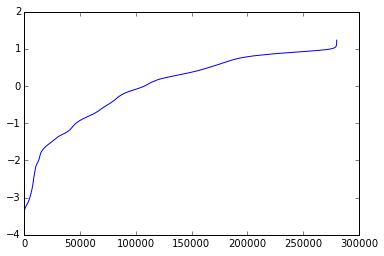

In [6]:
plt.plot(sorted(Y[:,0]))

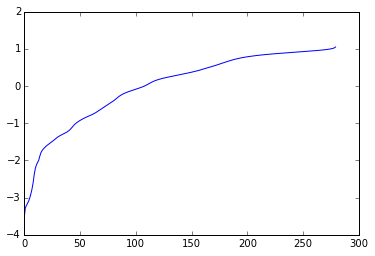

In [7]:
plt.plot(sorted(Y[:,0])[::1000])

In [8]:
ind = sorted(range(len(Y)),key=lambda i:Y[i,0])

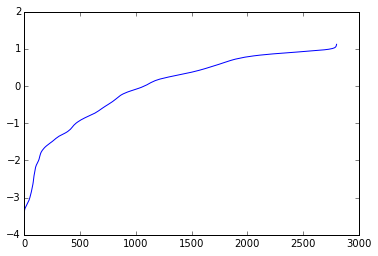

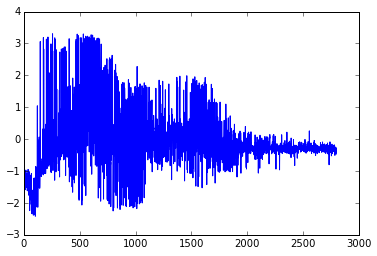

In [9]:
plt.plot(Y[ind,0][::100])
plt.figure()
plt.plot(Y[ind,1][::100])

In [10]:
import mdtraj

In [11]:
traj = fs[0]

In [12]:
for f in fs[1:]:
    traj = traj+f

In [13]:
frames = traj[ind[::1000]]
frames = frames.superpose(frames,0)

In [14]:
frames.save_pdb('fs_tic1_movie.pdb')